In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv("/content/SalaryMulti.csv")

In [ ]:
data.head()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.07055
1,4,0,2,3,64951.95098
2,13,4,8,3,106058.18520
3,11,3,2,1,89649.94485
4,8,1,6,3,82206.01969


In [ ]:
data=data.rename(columns=lambda x: x.replace(' ', '_'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total_Experience            1000 non-null   int64  
 1   Team_Lead_Experience        1000 non-null   int64  
 2   Project_Manager_Experience  1000 non-null   int64  
 3   Certifications              1000 non-null   int64  
 4   Salary                      1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [ ]:
data.head()

,Total_Experience,Team_Lead_Experience,Project_Manager_Experience,Certifications,Salary
0,7,2,4,1,77318.07055
1,4,0,2,3,64951.95098
2,13,4,8,3,106058.18520
3,11,3,2,1,89649.94485
4,8,1,6,3,82206.01969


In [ ]:
data.isna().sum()

Total_Experience              0
Team_Lead_Experience          0
Project_Manager_Experience    0
Certifications                0
Salary                        0
dtype: int64

In [ ]:
data.describe()

,Total_Experience,Team_Lead_Experience,Project_Manager_Experience,Certifications,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.443000,3.197000,1.629000,2.049000,81405.671672
std,4.113596,3.119282,2.148482,1.423596,18256.125771
min,1.000000,0.000000,0.000000,0.000000,42298.056830
25%,4.000000,1.000000,0.000000,1.000000,66045.779367
50%,7.000000,2.000000,1.000000,2.000000,81241.246180
75%,11.000000,5.000000,3.000000,3.000000,95624.152980
max,14.000000,13.000000,13.000000,4.000000,126221.716700


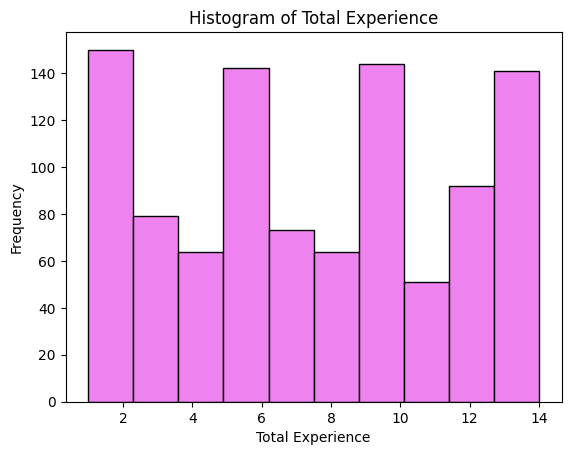

In [ ]:
plt.hist(data['Total_Experience'], bins=10, edgecolor='black',facecolor='violet')
plt.title('Histogram of Total Experience')
plt.xlabel('Total Experience')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-e791eac09cb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Total_Experience,kde=True)


<Axes: xlabel='Total_Experience', ylabel='Density'>

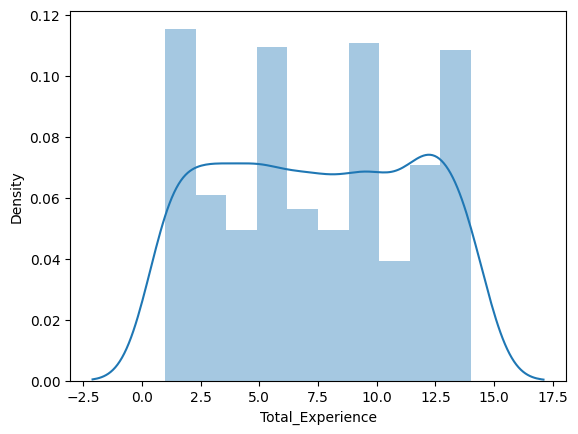

In [ ]:
sns.distplot(data.Total_Experience,kde=True)

In [ ]:
x=data.drop('Salary', axis=1)
y=data['Salary']


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
x_normalized = minmax_scaler.fit_transform(x_scaled)

In [ ]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, train_size = 0.75, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.coef_

array([2978.48226502, 1951.55198145,  987.73007022,  379.90514906])

In [ ]:
model.intercept_

50606.732468426664

In [ ]:
model.predict(xtest)

array([109422.22857215,  76546.74405161,  72137.51819497,  98715.33324976,
       100832.30218924,  53585.21473344,  62861.36646421,  68462.33400417,
        89843.60038532,  71529.69327381, 119195.28053375, 108321.71333831,
        95294.44302161,  74445.06716649, 110904.99839991,  84416.06034974,
        82240.79851436,  64964.90382262,  58311.2373668 ,  91857.65518084,
        54724.93018063, 100209.18521372,  64964.90382262,  64040.28212474,
       100753.90176254,  63241.27161327, 105052.20292886,  60034.86957616,
        54724.93018063,  55104.83532969,  82416.69205031,  95239.95075391,
        61517.63940392,  75723.82538115,  76839.63266934, 106890.96974669,
        73685.25686837,  94986.26234952,  78235.38596578,  93405.39385424,
        84479.16872208,  66423.76549139,  79058.30463624,  74065.16201743,
       103756.29218655,  69135.12777097,  71757.61304591,  67587.38909757,
        77866.56295291,  57703.41244564,  63445.28322638,  91795.15236677,
        57931.33221774,  

In [ ]:
ypred = model.predict(xtest)

In [ ]:
model.score(x,y)

0.9281236657301672

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 4592.637220157572


In [ ]:
new_data = {
    'Total_Experience': [9],
    'Team_Lead_Experience': [4],
    'Project_Manager_Experience': [2],
    'Certifications': [5]
}

new_data = pd.DataFrame(new_data)
new_scaled = scaler.transform(new_data)
predicted_salary = model.predict(new_scaled)

print(f"Predicted Salary: {predicted_salary[0]}")


Predicted Salary: 53195.84982477825


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
